# MODEL II - Basal Ganglia Model : MSN-Thalamus loops (2017)

#  - Import modules -

In [1]:
import os, time, random, json               # Utility: create, save and store the data.
import numpy as np                          # Utility: for everything.
import scipy.stats as stats                 # Utility: fourier transform.
from tqdm import tqdm                       # Utility: show a progress bar below the simulation core.

In [2]:
from matplotlib import pyplot as plt        # Utility: for the plots, using "plt" extension. 
import matplotlib                           # Utility: imported to enhance the ticks & labelsize of all plots.
matplotlib.rc('xtick', labelsize=20)        # Utility: enhance x-ticks visibility.
matplotlib.rc('ytick', labelsize=20)        # Utility: enhance y-ticks visibility.
plt.rcParams["axes.labelweight"] = "bold"   # Utility: axis label made bold (better visibility).

#  - Function definitions -

# 1 - Corrected Input

In [3]:
 ## Function returning the corrected Input (x = 0 if x <= 0  or  x = x if x >= 0)

def Ic(Input = 0):                          # the only argument is the input value. 
    
    """ 
    Use as argument the input value and 
    the fonction will transform any negative Input value 
    to zero whereas any positive Input value won't be transformed. 
    
    """
    
    
    if Input <= 0:                          # if input value is negative,  
        return 0                            # function return 0.
    
    else:                                   # if input value is not negative, the function  
        return (Input)                      # just return the input value.

# 2 - Activity value at time (t - Δ)

In [4]:
 ## Function to get the activity value at time (t - delta)

def delta(synapse_value, delay, t, dt,i): 
    
    """ 
    The first argument is the array (1D) containing all the activity values trought the time, 
    for solely one population. The second argument is the time delay, the third is the time, 
    the fourth is the time step used for the simulation, the fifth is the neuron number for 
    multiple neuron simulations with 2D array (Activity at time t x neuron number). 
    
    """
    
    
    if t < delay:                                        # if delay > time simulation, m(t-delta) = 0
        return 0
    
                                                         # Otherwise we can find the m(t-delta) value by taking
    else:                                                # the (delay/dt)th value, starting from the value at
        return synapse_value[ int(- delay / dt) ][i]     # time t (last value calculated in the array).
                                                         # [i] is the neuron number.
                                                         # (delay/dt) give the step number 
                                                         # between m(t) and m(t-delta)

# 3 - Plotting: Inputs & activities

In [5]:
 ## Plot the external Inputs in an horizontal bar chart plot 

def Inplot(x,data,title):
    
    """ Make an histogram of a set of data given (2nd argument). The first argument 'structure' is
    the structures we want to represent(array). the 3rd argument is the title of the plot(string).
    
    """

    
    ind  =    np.arange(len(data))                                      # number of groups
    fig  =    plt.figure()                                              # set the frame plot
    ax   =    plt.subplot(111)                                          # set the subplot
    
    ax.barh(ind, data, 0.899,color='g')                                 # Plotting the data with bar
    ax.set_yticks(ind)                                                  # name the y-axis label
    
    r    =    ax.set_yticklabels(x, ha = 'left',fontsize = 16)
    fig.set_size_inches(15, 2, forward=True)
    
    plt.draw()
    yax  =    ax.get_yaxis()
    pad  =    max(T.label.get_window_extent().width for T in yax.majorTicks)
    yax.set_tick_params(pad=pad,)
    

    plt.xlabel('spike per second [spk/s]')                                    # Set the x-axis label
    plt.ylabel('structures')                                                  # Set the y-axis label
    plt.title('External Input value for each structure')                      # Set the plot title
    
    plt.savefig('DataTha/{}/0_H.png'.format(timestr),dpi=72,bbox_inches='tight') # Save figure (72 DPi) in timestr 
                                                                                 # folder (Cf. Data_dir function)

In [6]:
 ## Plot activity or input dynamics depending on arguments

def plotting(k,typ, title, xax, yax, element, source, value, On): 
    
    """ 
    'k' argument is the neuron number (index) to know which neuron of all populations to plot, 
    'typ' argument is the kind (dictionnary) of value to look at (e.g., 'm' for activity or 'I' for input).  
    'title' argument is the plot title (string), 'xax' and 'yax' are the x-axis and y-axis label(string)
    ,respectively. the 'element' argument(e.g., con, stc) is the index of the 'source'(array) 
    argument(e.g. connections,structures). The 'value' argument is the dictionnary where to store 
    the processed value(e.g. 'value' or 'Mean'). On = 1 to take the mean of the data, On = 0 otherwise. 
    
    """
    
    
    fig = plt.figure(figsize=(15,10))                        # Set the global figure and choose the size.
    ax=fig.add_subplot(111)                                  # Set a subplot.
    
    
    for element in source:                                   # for every element in array source,
        value[element]=np.zeros(n_period)                    # it creates an array of zeros x n_period, 
                                                             # with the "element" as key
        for t in range(0,n_period):
                                                             # for all time step of the simulation.
            if On == 0:                                      # If On = 0, 
                value[element][t] = typ[element][t][k]       # we put the value of neuron k at time t 
                
            else:                                            # in the array created above for each time.
                value[element][t] = np.mean(typ[element][t]) # If On = 1, we take the mean of all the neuron at 
                                                             # time t.

                
        ax.plot(time_value*1000, value[element], label= str(element),linewidth=2)  # plotting x = f(t)
        ax.set_title((title + ' {}'.format(k+1)))                                  # Set the title w/ neuron number
        ax.set_ylabel(yax), ax.set_xlabel(xax)                                         # Set the y & x -axis label
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,prop={'size':15})   # Set a legend, its location
                                                                                       # & size (for labels). 

# 4 - Creating data folder

In [7]:
 ## Will create the folders needed to store values in CWD/Data pathway

def data_dir(dir="os.getcwd()"):
    
    """ 
    The only argument is the pathway to look in, by default the current working directory.
    This function is aimed to create a folder "Data" in the current working directory (CWD) to store all
    our results in. If the folder is already created, no new folder is added. The second part of 
    the function use the real computer time to tag a newly created folder in "Data" folder.
    timestr is the date and time (yyyy-mm-dd-HH:MM:SS). At each new simulation trial, a new tagged folder
    is created in the "Data" folder of the CWD.
    
    """
    
    
    if not os.path.exists('{}/{}'.format(os.getcwd(),'DataTha')): # If no "DataFsi" folder exist in the CWD, 
        directory = os.path.dirname(dir)
        os.makedirs('{}/{}'.format(os.getcwd(),'DataTha'))        # it will create it. 
        
                                                                 # timestr will be used to tag simulation results
    if not os.path.exists('DataTha/{}'.format(timestr)):         # folder. If no folder with the current 
        os.makedirs('DataTha/{}'.format(timestr))                # time launch simulation is already created,
                                                                 # it will create it.  

# 5 - Spectral analysis & plotting function

In [8]:
 ## Plot the spectrum of all populations and return their plot 

def Spectrum(): 
    
    """ 
    Use the mean activities of all neurons over time and give the spectrum/frequency 
    analysis of the signal with a plot for all populations. 
    
    """
    
    
    col=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']     # Array containing color "code".
    
    FourNormalized =    dict()                                           # Create some dictionnary to store the 
    fourier        =    dict()                                           # values of the FFT.
    freq           =    dict()

    fig, axes = plt.subplots(1, 6, figsize=(18, 5))                      # Set the frame & size of the futur plot.
    fig.suptitle("Discrete fourier transform of Outputs",y=1.05, fontsize=20)
    i=0                                                                  # Just count the number of iteration to
                                                                         # select a color for plotting.
    for con in connections:                                              
        
        FourNormalized[con] = Mean[con] - np.mean(Mean[con])

 # Fast Fourrier Transform of signal
        fourier[con]  =  np.fft.fft(FourNormalized[con]) / len(FourNormalized[con])
        freq[con]     =  np.fft.fftfreq(fourier[con].shape[0],dt)

        toc = np.argmax(abs(fourier[con]))                               # we take the maximum value
                                                                         # (dominant frequency)
 # Plotting FFT of signal
        axes[i].plot(freq[con],abs(fourier[con]),label=str(abs(freq[con][toc]))+' Hz',     # Plotting the results
                 color=col[i+2],linewidth=3)                                               
        axes[i].set_title(con,fontsize=20)
        axes[i].set_xlabel('spectrum range [Hz]', fontsize=12)
        axes[i].set_xlim(0,50)
        axes[i].set_ylabel('Amplitude (normalized)',fontsize=12)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0. , fontsize=10)
        i+=1
            
    plt.savefig('DataTha/{}/FFT_{}.png'.format(timestr,'Mean'),dpi=72,bbox_inches='tight')
    plt.show()

#  - Initial parameters - 

# 1 - Initialisation : optimisation tools

In [ ]:
 ## Initialization of the random generator (reproductibility)

w           =        np.random.randint(1,10)        # we choose a random number to be used as seed
                                                    # and saved (Json) for reproductibility.
np.random.seed(w)                                   # Initialisation of the random generator.

In [11]:
 ## Dictionnary to store Mean, m, dm, J, y, value, H and I values

Mean, m, dm, I  =    dict(), dict(), dict(), dict() # Dictionnary used to store our values and make easier
J, H, y, value  =    dict(), dict(), dict(), dict() # the call of a particular value with keys.
T               =    dict()                         # T will be used to store the threshold distribution

# 2 - Setting parameters

In [9]:
## Population size (number of neuron)
n = 1

## Default Time beginning (second)
t = 0

## Default trial duration (second)
duration = 1.00   

## Default Time resolution (second)
dt = 0.0001  # 0.00001

## Period occuring 
n_period = int(duration // dt) + 1

## Initialization of the random generator (reproductibility)
np.random.seed(1)

In [10]:
time_value = np.arange(0, duration, dt) # creat the timescale, depending on the duration and step dt, for plotting

In [12]:
connections = ["GPeMsnD2","SNrMsnD1", "SNrGPe", "ThaSNr", "MsnD2Tha", "MsnD1Tha"]
structures = ["MsnD1", "MsnD2", "GPe", "SNr", "Tha"]

In [13]:
 ## Fixed point activity: (IN VIVO Values needed)
M = {                     
    "GPeMsnD2": 2.00,
    "SNrMsnD1": 2.00,
    "SNrGPe": 30.00,
    "ThaSNr": 30.00, 
    "MsnD2Tha": 10.00,
    "MsnD1Tha": 10.00
}

 ## Weights (connextions pre->post ; notation: PostPre):
G = {
    "GPeMsnD2": 1.00,  # aucun effet oscillatoire
    "SNrMsnD1": 1.00,  # aucun effet oscillatoire
    "SNrGPe": 7.00, # important pour les oscillations !
    "ThaSNr": 1.00, # important pour les oscillations ! 
    "MsnD2Tha": 1.00,  # aucun effet oscillatoire
    "MsnD1Tha": 1.00   # aucun effet oscillatoire
}

 ## Tau:
tau = {
    "GPeMsnD2": 0.020,
    "SNrMsnD1": 0.020,
    "SNrGPe": 0.001,
    "ThaSNr": 0.005,
    "MsnD2Tha": 0.005,
    "MsnD1Tha": 0.005
}

 ## Delays:
D = {
    "GPeMsnD2": 0.007, #0.007
    "SNrMsnD1": 0.007, #0.007
    "SNrGPe": 0.001,   #0.001
    "ThaSNr": 0.005,   #0.001
    "MsnD2Tha": 0.001, #0.001
    "MsnD1Tha": 0.001  #0.001
}

 ## Connection probability:
C = {
    "GPeMsnD2": 1.00,
    "SNrMsnD1": 1.00,
    "SNrGPe": 1.00,
    "ThaSNr": 1.00,
    "MsnD2Tha": 1.00,
    "MsnD1Tha": 1.00
}

 ## External Input, calculated and constant all over the simulation
H = {
    "MsnD1": M["SNrMsnD1"]-G["MsnD1Tha"]*M["MsnD1Tha"],   
    "MsnD2": M["GPeMsnD2"]-G["MsnD2Tha"]*M["MsnD2Tha"],   
    "GPe": M["SNrGPe"]+G["GPeMsnD2"]*M["GPeMsnD2"],   
    "SNr": M["ThaSNr"]+G["SNrGPe"]*M["SNrGPe"]+G["SNrMsnD1"]*M["SNrMsnD1"],
    "Tha": M["MsnD2Tha"]+G["MsnD2Tha"]*M["MsnD2Tha"]   
}

 ## Noise (sigma):
N = {
    "MsnD1": 0, #H["MsnD1"]/10,   
    "MsnD2": 0, #H["MsnD2"]/10,   
    "GPe": 0,   #H["GPe"]/10,   
    "SNr": 0,   #H["SNr"]/10,
    "Tha": 0    #H["Tha"]/10    
}

In [14]:
input_mapping = {
    "MsnD1": "MsnD1Tha",
    "MsnD2": "MsnD2Tha",
    "GPe": "GPeMsnD2",
    "SNr": "SNrGPe",                     #"SNr":"SNrMsnD1"
    "Tha": "ThaSNr"
}

activities_mapping = {
    "GPeMsnD2": "MsnD2",
    "SNrMsnD1": "MsnD1",
    "SNrGPe": "GPe",
    "ThaSNr": "SNr",
    "MsnD2Tha": "Tha",
    "MsnD1Tha": "Tha"
}

In [15]:
## create an array of 'nperiod' array (store value trought time) with n zeroes in
for con in connections:   
    m[con] = np.zeros((n_period, n))
   
    y[con]=int(D[con]//dt)
    m[con][0:y[con]]= M[con] #    m[con][0:y[con]:n]?
## create an array composed of     
    dm[con] = np.zeros((n_period, n))
## create an array composed of 0 & 1 depending on the probability "Co"(max=1=100%)
    J[con] = np.random.choice(2, size=(n, n), p=[(1-C[con]),C[con]])

In [16]:
## inputs array generation: 
for stc in structures:                                                             
    #T[stc] = np.random.normal(0, TN[stc], size=n)
    I[stc] = np.random.normal(0, N[stc], size=(n_period, n)) + H[stc] #+ T[stc]  

# ✔	 - Simulation Core -

In [17]:
for t in tqdm(range(1, n_period)):    ## Update of Inputs
    
    for stc in structures:
        for i in range(n):
            con = input_mapping[stc] #multiplication by the probability of connexion below with n
            if stc == 'SNr':
                I[stc][t][i] += - np.sum((G["SNrGPe"]* delta(m[con][:t + 1], D["SNrGPe"], time_value[t], dt,i) *J["SNrGPe"][i]) + (G["SNrMsnD1"]* delta(m[con][:t + 1], D["SNrMsnD1"], time_value[t], dt,i) *J["SNrMsnD1"][i]))/(2*n)         
            elif stc == 'MsnD1' or 'MsnD2':
                I[stc][t][i] += np.sum(G[con]* delta(m[con][:t + 1], D[con], time_value[t], dt,i) *J[con][i])/(n)  
            else:
                I[stc][t][i] += - np.sum(G[con]* delta(m[con][:t + 1], D[con], time_value[t], dt,i) *J[con][i])/(n) 
                
    for con in connections:          ## Update of activities
        for i in range(n):
            stc = activities_mapping[con]
            if con == "SNr":
                dm['SNrGPe'][t][i] = (dt * (- m['SNrGPe'][t][i] + Ic(I['GPe'][t][i])) / tau['SNrGPe']) +(dt * (- m['SNrMsnD1'][t][i] + Ic(I['MsnD1'][t][i])) / tau['SNrMsnD1'])
            else:
                dm[con][t][i] = dt * (- m[con][t][i] + Ic(I[stc][t][i])) / tau[con]
            
        if t < n_period-1: # we can't add last value of dm to the last value of m
            m[con][t+1]=m[con][t]+dm[con][t]
        else:
            pass
            

100%|██████████| 9999/9999 [00:00<00:00, 17402.88it/s]


# ✔	 - Result Plots & Save data -

In [18]:
timestr = time.strftime("%Y-%m-%d-%H:%M:%S") # give the date and time used to tag simulation results
data_dir()  # creating the 'Data' directory on CWD and the directory (with date & time) to store the results

for stc in structures:  # save the Input array (npy format) for each neuron population in "structures"
    np.save('DataTha/{}/{}_Inputs'.format(timestr, stc), I[stc])
    
for con in connections: # save the Activity array (npy format) for each neuron population in "connections"
    np.save('DataTha/{}/{}_Activities'.format(timestr, con), m[con])

datax={'Weight':G,'Delay':D,'tau':tau,'Noise':N,'BasalActivity':M,'ConnexProba':C,  # make one dict with all parameters used 
       'ExternalInput':H,'Neuron_number':n,'time_trial':t,'duration':duration,'step':dt}

with open('DataTha/{}/0_Parameters.json'.format(timestr),'w') as f: # save the parameters used during the simulation
            json.dump(datax, f) 

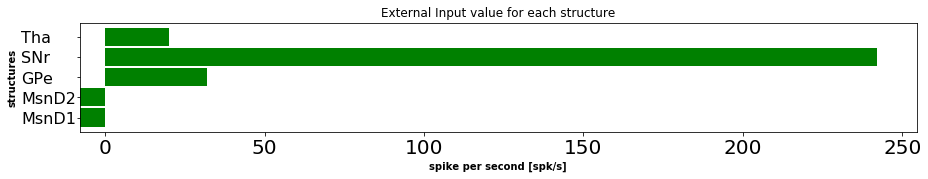

In [19]:
## Plotting EXTERNAL INPUTS
Inplot(structures,[H["MsnD1"], H["MsnD2"], H["GPe"], H["SNr"], H["Tha"]],'External Input value for each structure')
plt.savefig('DataTha/{}/0_H.png'.format(timestr),dpi=300,bbox_inches='tight')
plt.show()

# ✔	 - Mean firing rate plotting - 

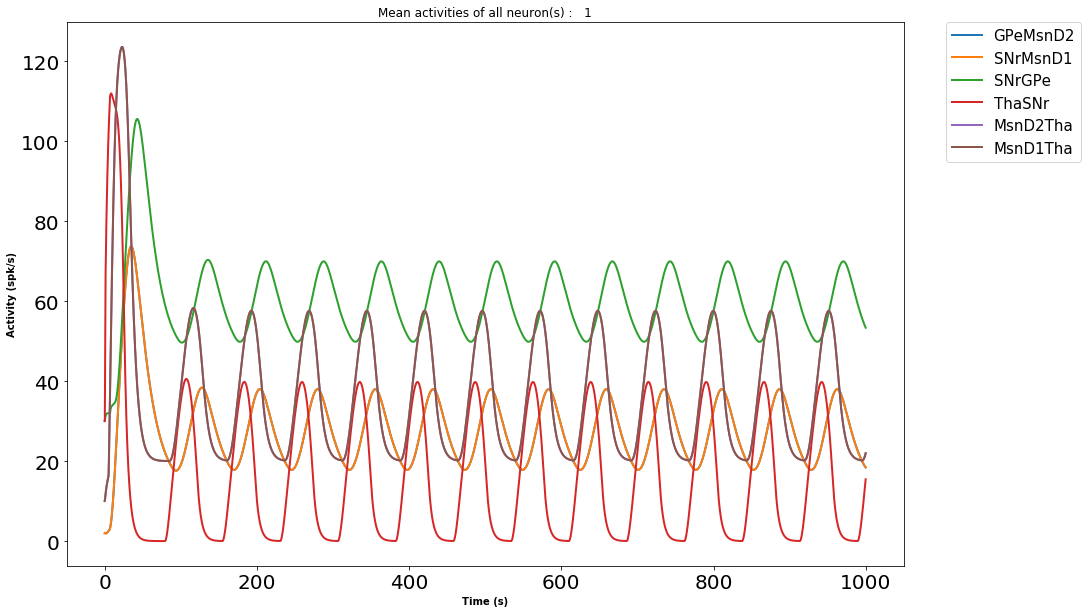

In [20]:
## Ploting the mean activity of the n neuron
plotting(n-1, m, 'Mean activities of all neuron(s) :  ', 'Time (s)','Activity (spk/s)', con, connections,Mean,On=1)
plt.savefig('DataTha/{}/{}_Mean_Activities.png'.format(timestr,'0'),dpi=300,bbox_inches='tight')
plt.show()

# ✔	 -  Fourier transform (DFT): Spectrum analysis

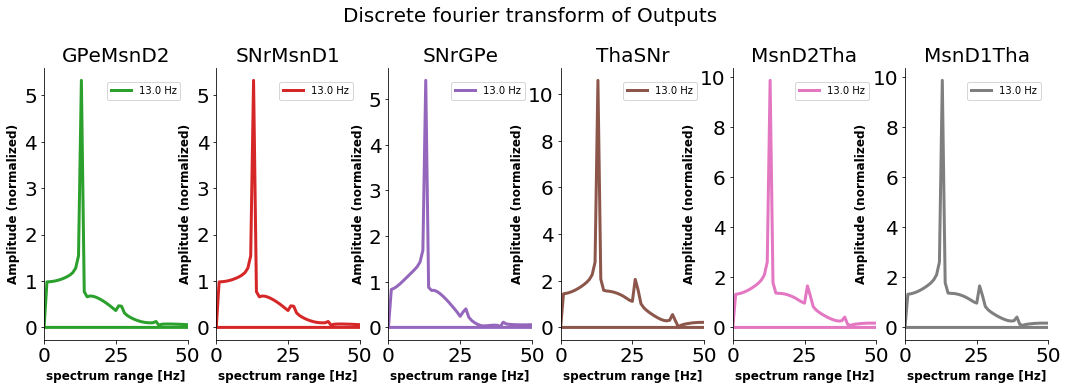

In [21]:
Spectrum()